# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.
   

Deskripsi Dataset
---
- **CUST_ID** : Identifikasi pemegang kartu kredit (**Kategorikal**)  
- **BALANCE** : Jumlah saldo yang tersisa di akun untuk melakukan pembelian  
- **BALANCE_FREQUENCY** : Seberapa sering saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = jarang diperbarui)  
- **PURCHASES** : Total jumlah pembelian yang dilakukan dari akun  
- **ONEOFF_PURCHASES** : Jumlah maksimum pembelian yang dilakukan dalam satu transaksi  
- **INSTALLMENTS_PURCHASES** : Total jumlah pembelian yang dilakukan dengan cicilan  
- **CASH_ADVANCE** : Uang muka tunai yang diberikan kepada pengguna  
- **PURCHASES_FREQUENCY** : Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 = sering, 0 = jarang)  
- **ONEOFFPURCHASESFREQUENCY** : Seberapa sering pembelian dalam satu transaksi terjadi (1 = sering, 0 = jarang)  
- **PURCHASESINSTALLMENTSFREQUENCY** : Seberapa sering pembelian dengan cicilan dilakukan (1 = sering, 0 = jarang)  
- **CASHADVANCEFREQUENCY** : Seberapa sering uang muka tunai dibayarkan  
- **CASHADVANCETRX** : Jumlah transaksi yang dilakukan dengan "Uang Muka Tunai"  
- **PURCHASES_TRX** : Jumlah transaksi pembelian yang dilakukan  
- **CREDIT_LIMIT** : Batas kredit kartu pengguna  
- **PAYMENTS** : Jumlah pembayaran yang dilakukan oleh pengguna  
- **MINIMUM_PAYMENTS** : Jumlah pembayaran minimum yang dilakukan oleh pengguna  
- **PRCFULLPAYMENT** : Persentase pembayaran penuh yang dibayarkan oleh pengguna  
- **TENURE** : Lama waktu layanan kartu kredit digunakan oleh pengguna  

---


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Type your code here
cluster_df = pd.read_csv('Dataset_inisiasi.csv')

cluster_df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Struktur Dataset

In [3]:
#Type your code here
cluster_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
cluster_df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [5]:
cluster_df.shape

(8950, 18)

terlihat dataset memiliki 8950 baris dan 18 kolom

In [6]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Ada 14 fitur numerik float, 3 fitur numerik integer, dan 1 kolom object (CUST_ID).
untuk data kategorikal perlu preprocessing pada kolom kolom tertentu

selain itu terdapat missing values juga, mari kita lihat lebih lanjut

In [7]:
cluster_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

ada 1 pada credit limit, karena tidak banyak kemungkinan akan kita drop lalu ada sebanyak 313 pada minimum_payment akan kita lihat apakah median atau mean

In [8]:
print("Jumlah data duplikat:", cluster_df.duplicated().sum())

Jumlah data duplikat: 0


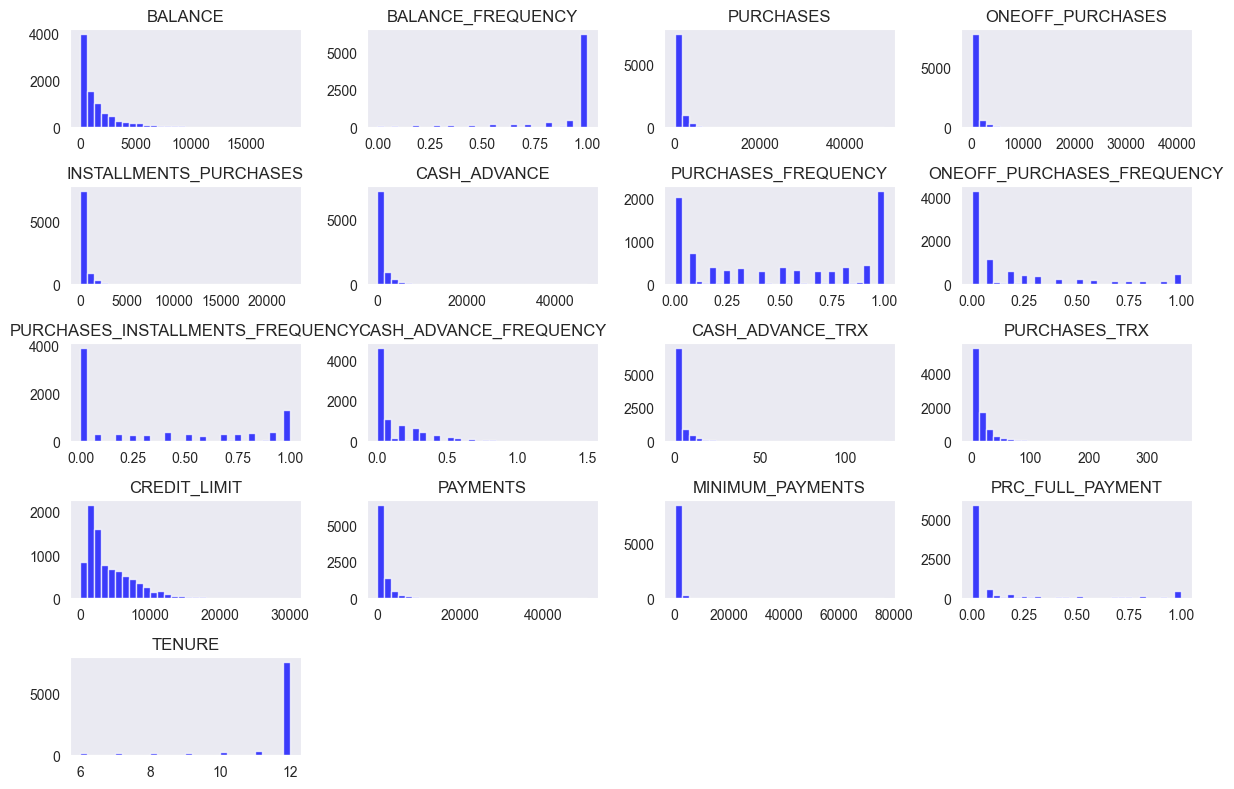

In [98]:
cluster_df.hist(figsize=(12, 8), bins=30, grid=False, alpha=0.75, color='blue')
plt.tight_layout()  
plt.show()

dalam visualisasi histogram diatas terlihat distribusi skewed positive yang dimiliki oleh BALANCE, PURCHASES, ONEOFF_PURCHASES, CASH_ADVANCE, PAYMENTS, MINIMUM_PAYMENTS, dan CREDIT_LIMIT. hal ini menunjukan mayoritas pelanggan memiliki saldo dan limit yang relatif kecil serta jarang melakukan pembelian dalam jumlah besar yang dimana ini menyebabkan adanya outlier.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12152\3980849438.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cluster_df[col], ax=axes[i], palette="Set2")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12152\3980849438.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cluster_df[col], ax=axes[i], palette="Set2")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12152\3980849438.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cluster_df[col], ax=axes[i], palette="Set2")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12152\3

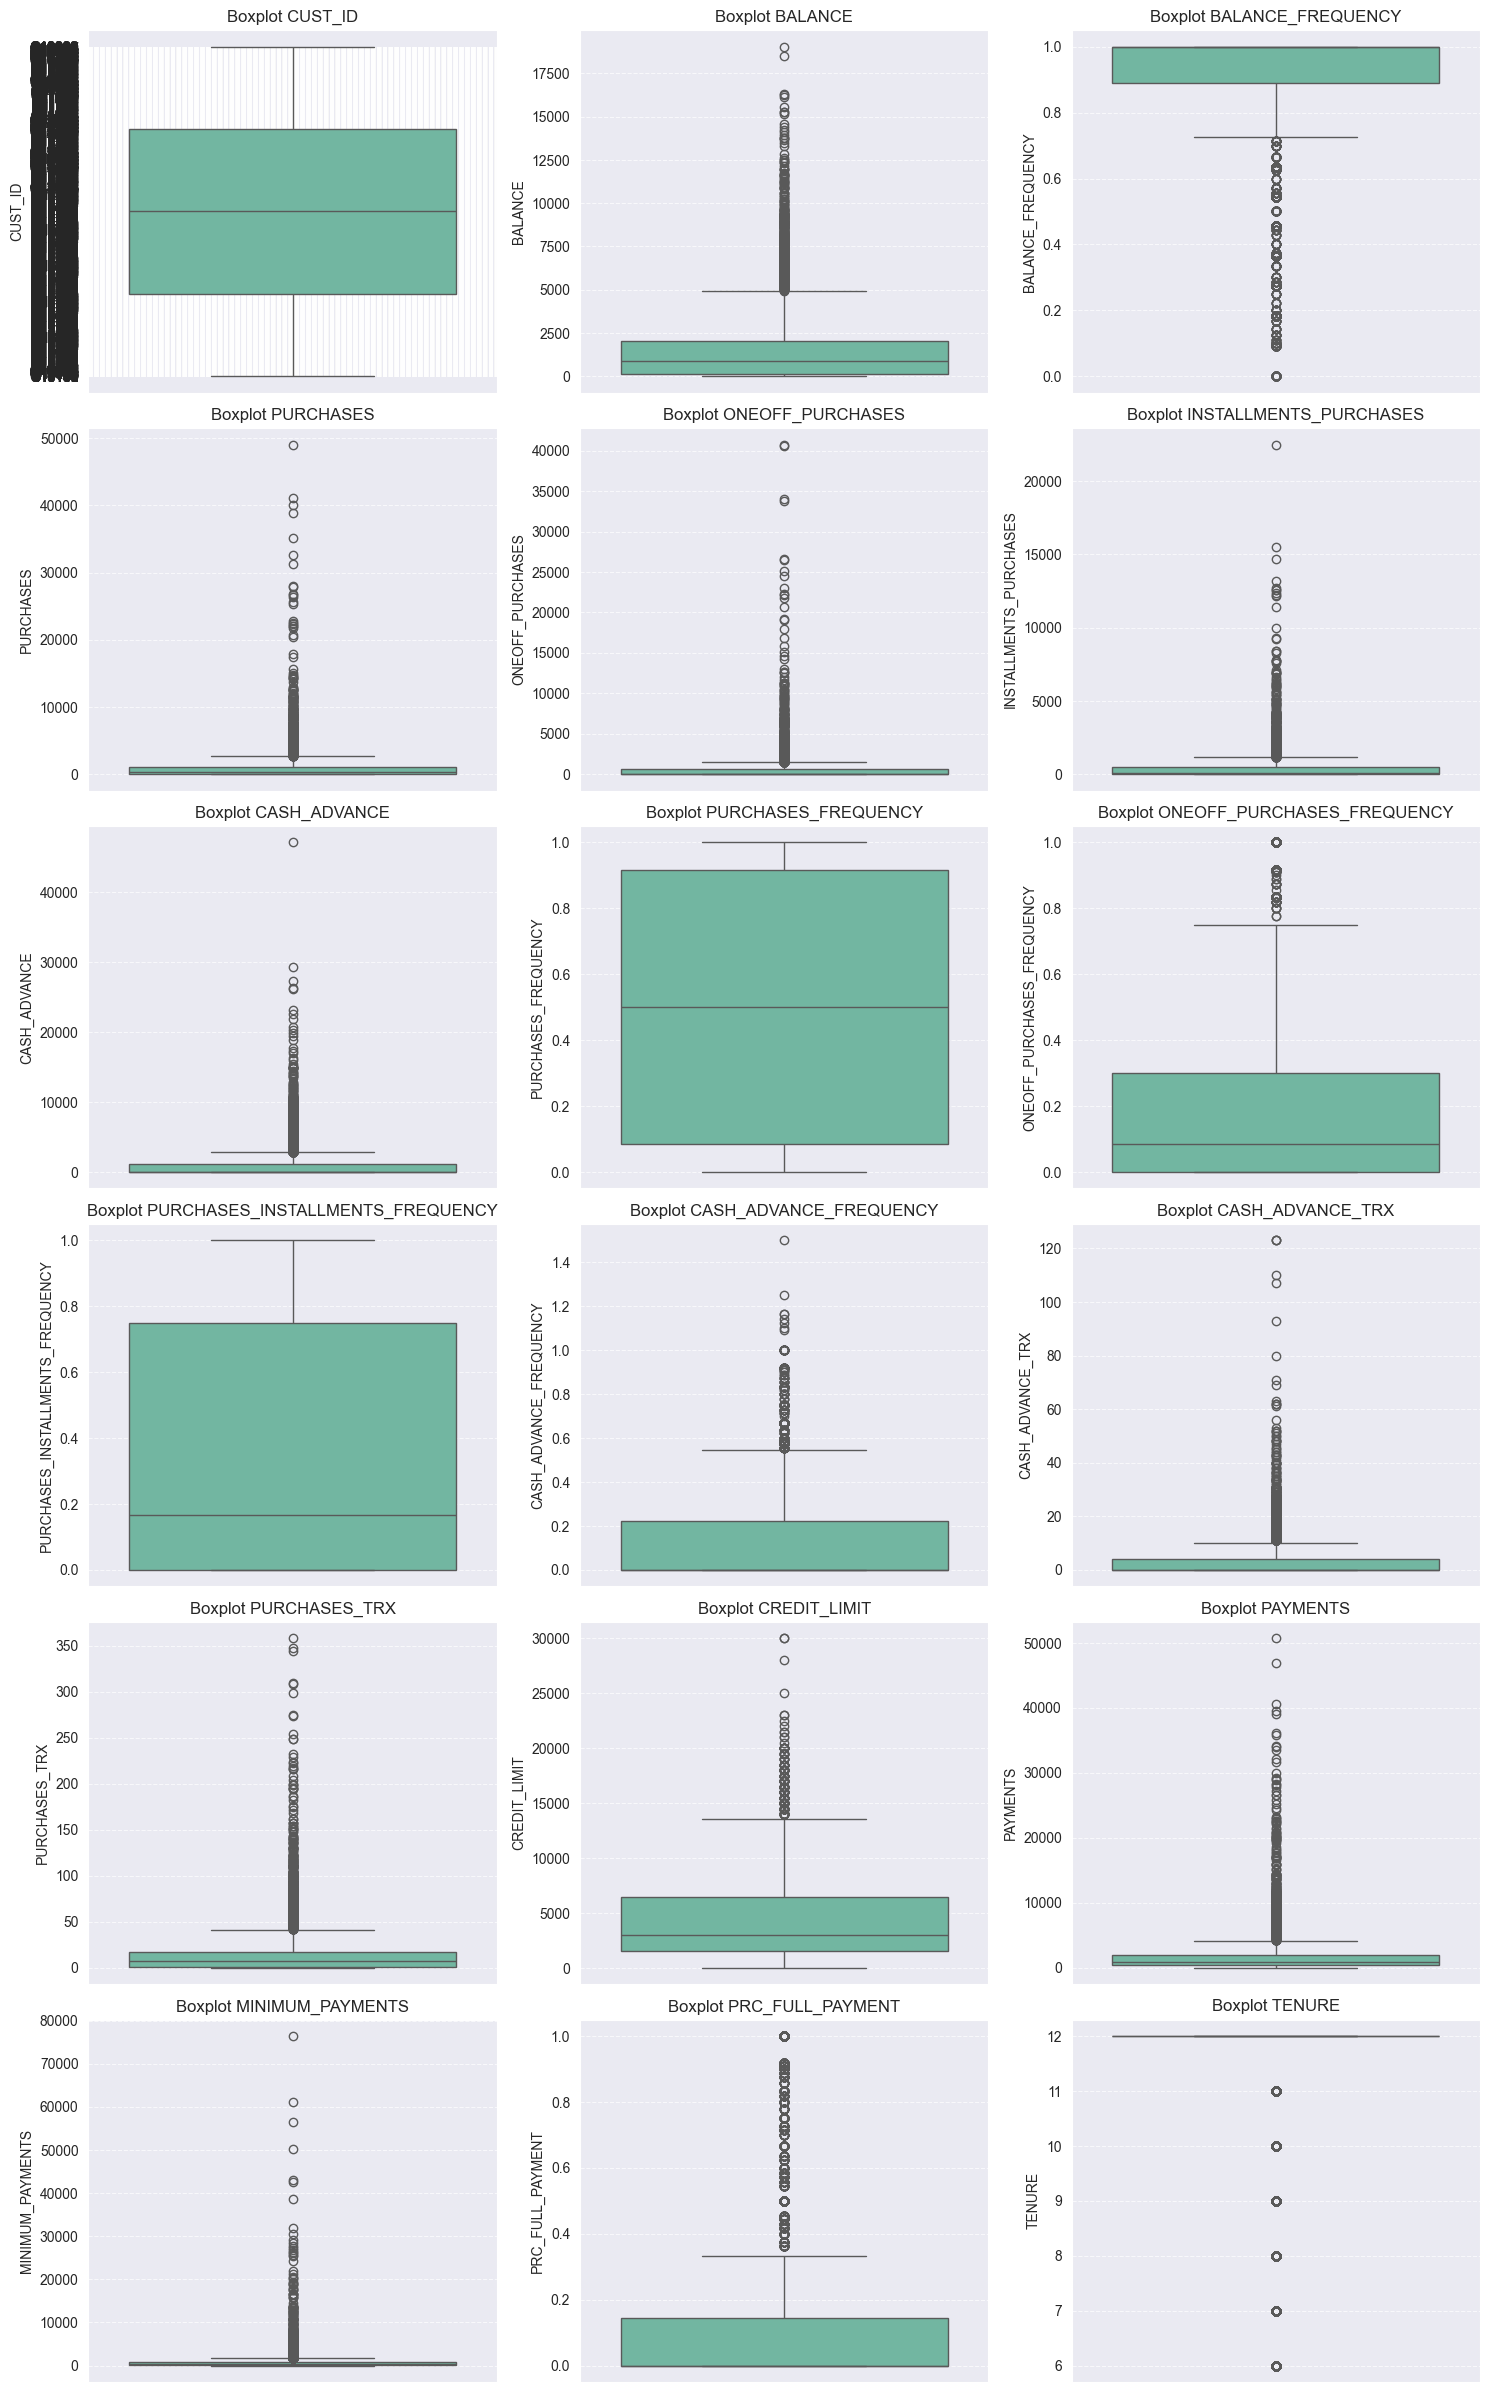

In [99]:
# Menentukan jumlah kolom dan baris berdasarkan jumlah fitur
num_features = len(cluster_df.columns)
rows = (num_features // 3) + 1  # Maksimal 3 kolom per baris

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Atur ukuran figure
axes = axes.flatten()  # Flatten array agar bisa diiterasi

# Looping untuk membuat boxplot setiap fitur
for i, col in enumerate(cluster_df.columns):
    sns.boxplot(data=cluster_df[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"Boxplot {col}", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hapus subplot kosong jika jumlah fitur tidak kelipatan 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Atur tata letak agar tidak bertabrakan
plt.show()

terlihat bahwa setiap kolom memiliki outlier yang sangat parah

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12152\3762672907.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cluster_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


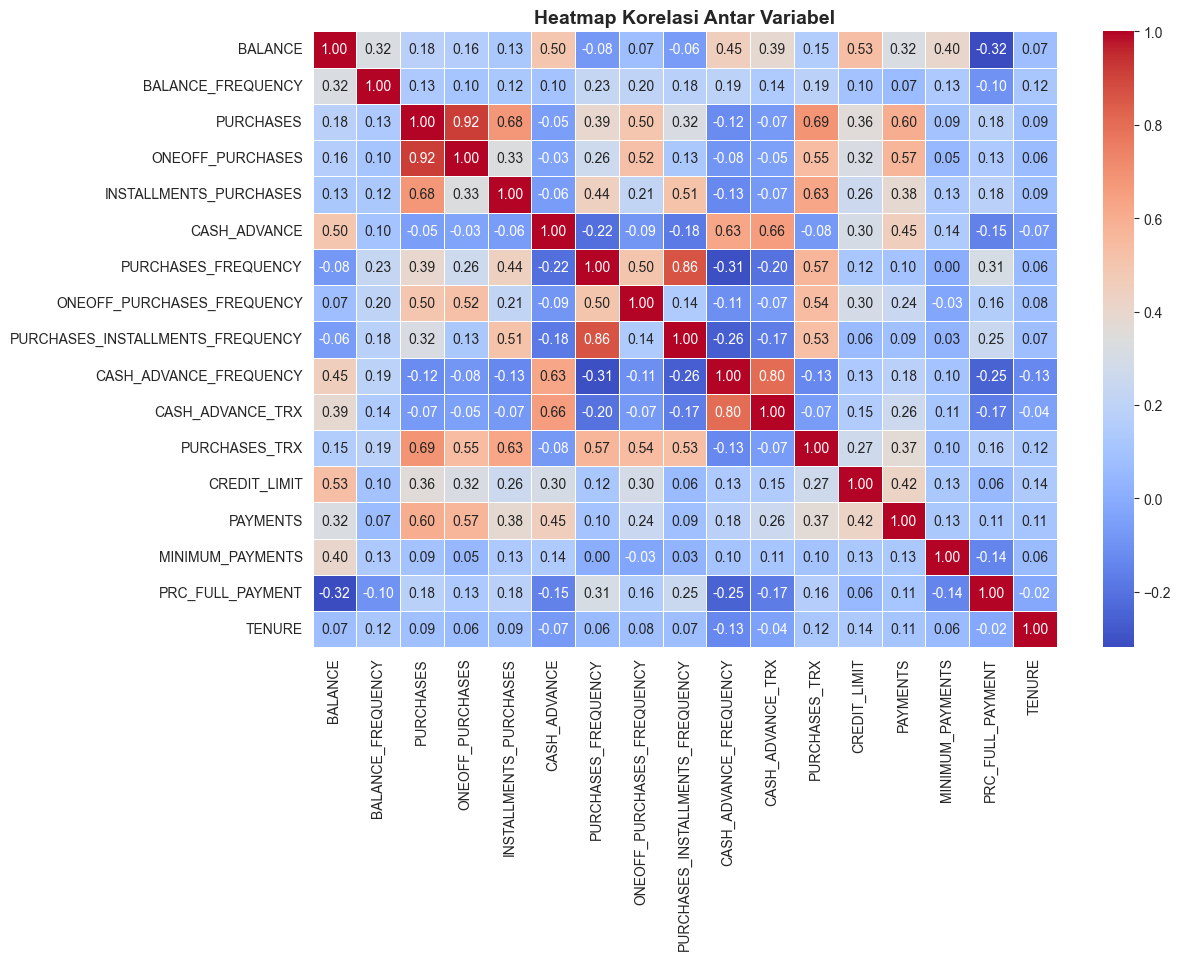

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel", fontsize=14, fontweight='bold')
plt.show()

terlihat bahwa beberapa kolom memiliki korelasi yang dimana bisa digunakan sebagai fitur

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

filling & drop missing value

menghapus satu baris yang memiliki satu kolom null

In [12]:
#Type your code here
cluster_df = cluster_df.dropna(thresh=len(cluster_df.columns)-1)

mengisi nilai kosong

In [13]:
cluster_df.fillna(cluster_df.median(numeric_only=True), inplace=True)

In [14]:
print(cluster_df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


binning pada data numerikal terpilih dikarenakan seluruh kolom bertipe numerik
kenapa binning dilakukan? karena datasetnya bertipe numerik semua kolomnya, namun bisa kita ubah sebagai kategorikal karena nilai rentangnya dapat dibagi menjadi beberapa kategori

In [15]:
cluster_df_processed = cluster_df.copy()

In [16]:
cluster_df_processed['TENURE_BIN'] = pd.cut(cluster_df_processed['TENURE'], 
                                    bins=[5, 8, 10, 12], 
                                    labels=['Baru', 'Menengah', 'Lama'], 
                                    include_lowest=True)
# Credit Limit (Low, Medium, High)
cluster_df_processed['CREDIT_LIMIT_BIN'] = pd.qcut(cluster_df_processed['CREDIT_LIMIT'], q=3, labels=['Low', 'Medium', 'High'])

# PRC_FULL_PAYMENT (Tidak Pernah, Kadang-kadang, Selalu)
cluster_df_processed['PRC_FULL_PAYMENT_BIN'] = pd.cut(cluster_df_processed['PRC_FULL_PAYMENT'], bins=[-0.01, 0.1, 0.5, 1],labels=['Tidak Pernah', 'Kadang-kadang', 'Selalu'])
cluster_df_processed.drop(columns=['TENURE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT'], inplace=True)
cluster_df_processed.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE_BIN,CREDIT_LIMIT_BIN,PRC_FULL_PAYMENT_BIN
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,139.509787,Lama,Low,Tidak Pernah
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,1072.340217,Lama,High,Kadang-kadang
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,627.284787,Lama,High,Tidak Pernah
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,312.343947,Lama,High,Tidak Pernah
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,244.791237,Lama,Low,Tidak Pernah


Selanjutnya kolom kategorikal di One-hot encoding

In [17]:
# Melakukan One-Hot Encoding untuk fitur yang sudah dibinning
cluster_df_encoded = pd.get_dummies(cluster_df_processed, columns=['TENURE_BIN', 'CREDIT_LIMIT_BIN', 'PRC_FULL_PAYMENT_BIN'], drop_first=True)
cluster_df_encoded.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE_BIN_Menengah,TENURE_BIN_Lama,CREDIT_LIMIT_BIN_Medium,CREDIT_LIMIT_BIN_High,PRC_FULL_PAYMENT_BIN_Kadang-kadang,PRC_FULL_PAYMENT_BIN_Selalu
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,201.802084,139.509787,0,1,0,0,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,4103.032597,1072.340217,0,1,0,1,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,622.066742,627.284787,0,1,0,1,0,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,0.000000,312.343947,0,1,0,1,0,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,678.334763,244.791237,0,1,0,0,0,0


Lalu di scaler. alasan saya memilih robust scaler karena scaler ini bekerja baik dengan data yang memiliki outlier ekstrim dimana sesuai dengan dataset yang saya miliki

In [18]:
num_cols = cluster_df_encoded.select_dtypes(include=['number']).columns.tolist()

# Hapus kolom hasil encoding dari daftar numerik
encoded_cols = ['TENURE_BIN_Lama','TENURE_BIN_Baru', 'TENURE_BIN_Menengah', 'CREDIT_LIMIT_BIN_Low', 
                'CREDIT_LIMIT_BIN_Medium','CREDIT_LIMIT_BIN_High', 'PRC_FULL_PAYMENT_BIN_Tidak Pernah', 
                'PRC_FULL_PAYMENT_BIN_Kadang-kadang','PRC_FULL_PAYMENT_BIN_Selalu']  # Sesuaikan dengan hasil encoding

num_cols = [col for col in num_cols if col not in encoded_cols]

scaler = RobustScaler()
cluster_df_scaled = cluster_df_encoded.copy()
cluster_df_scaled[num_cols] = scaler.fit_transform(cluster_df_scaled[num_cols])

cluster_df_scaled.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE_BIN_Menengah,TENURE_BIN_Lama,CREDIT_LIMIT_BIN_Medium,CREDIT_LIMIT_BIN_High,PRC_FULL_PAYMENT_BIN_Kadang-kadang,PRC_FULL_PAYMENT_BIN_Selalu
0,C10001,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,...,0.00,-0.3125,-0.431595,-0.279732,0,1,0,0,0,0
1,C10002,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,...,1.00,-0.4375,2.138626,1.230054,0,1,0,1,1,0
2,C10003,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,...,0.00,0.3125,-0.154715,0.509732,0,1,0,1,0,0
3,C10004,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,...,0.25,-0.3750,-0.564547,0.000000,0,1,0,1,0,0
4,C10005,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,...,0.00,-0.3750,-0.117644,-0.109334,0,1,0,0,0,0


Berdasarkan hasil heatmap diatas saya akan memilih kolom kolom yang akan dipakai sebagai penentuan cluster

In [53]:
selected_features = [
    'PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'ONEOFF_PURCHASES',
    'BALANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PAYMENTS',
    'TENURE_BIN_Menengah', 'TENURE_BIN_Lama',
    'CREDIT_LIMIT_BIN_Medium', 'CREDIT_LIMIT_BIN_High',
    'PRC_FULL_PAYMENT_BIN_Kadang-kadang', 'PRC_FULL_PAYMENT_BIN_Selalu'
]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Disini Algoritma yang akan dipakai adalah K-Means

Lalu kita akan mencopy sekaligus drop kolom yang tidak masuk selected features

In [67]:
cluster_df_elbow = cluster_df_scaled[selected_features]

elbow method untuk mencari jumlah cluster optimal

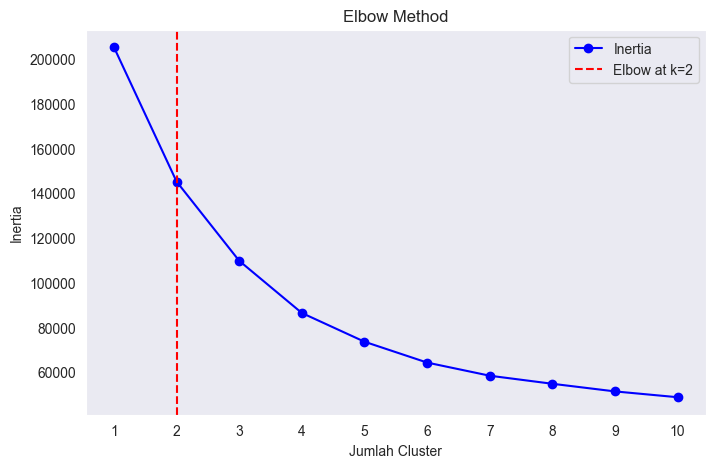

Titik elbow yang terdeteksi: k=2


In [100]:
#Type your code here
x = cluster_df_elbow.values
cluster_range = range(1, 11)
inertia = []  # List untuk menyimpan nilai inertia

# Iterasi untuk setiap jumlah cluster
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)  # Simpan nilai inertia

# Menentukan titik elbow (perubahan inertia terbesar)
diff = np.diff(inertia)
elbow_point = np.argmin(diff) + 2 

# Visualisasi hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='b', label='Inertia')
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at k={elbow_point}')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(cluster_range)
plt.grid()
plt.legend()
plt.show()
print(f"Titik elbow yang terdeteksi: k={elbow_point}")

Jumlah cluster yang optimal adalah 2 jadi disini kita akan langsung fitting model

In [78]:
# Inisialisasi model clustering
kmeans = KMeans(n_clusters=elbow_point, random_state=42, n_init=20, max_iter=500, tol=1e-6)
# Fitting model dan mendapatkan label cluster
kmeans_labels = kmeans.fit_predict(x)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [57]:
#Type your code here
def calculate_silhouette(X, labels, method_name):
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:  # Silhouette tidak bisa dihitung jika hanya 1 cluster
        score = silhouette_score(X, labels)
        print(f"Silhouette Score {method_name}: {score:.4f}")
    else:
        print(f"Silhouette Score {method_name}: Tidak bisa dihitung (hanya 1 cluster)")

In [79]:
# Evaluasi silhouette score untuk setiap model
calculate_silhouette(x, kmeans_labels, "K-Means")

Silhouette Score K-Means: 0.7312


Sudah terlihat bahwa model memiliki nilai sebanyak 0.7312 dimana itu sudah sesuai target

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

SyntaxError: invalid syntax (3900201583.py, line 1)

karena sudah sesuai target maka tidak perlu melakukan feature selection

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12152\2224783549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df_elbow['Cluster'] = kmeans_labels


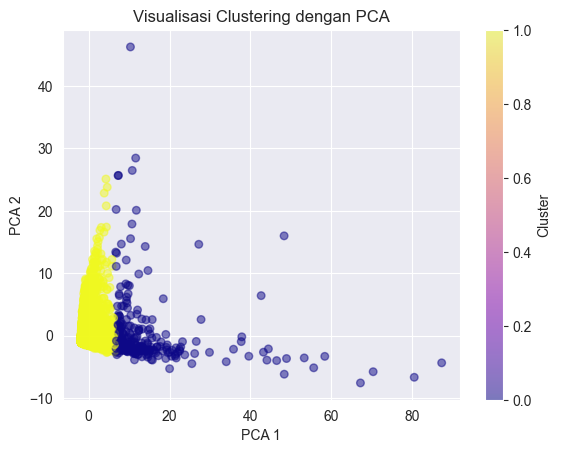

In [102]:
# Reduksi dimensi ke 2D pakai PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)  # x adalah cluster_df_elbow.values
# Tambahkan cluster ke DataFrame sebelum visualisasi
cluster_df_elbow['Cluster'] = kmeans_labels  

# Visualisasi dengan warna berbeda tiap cluster
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_df_elbow['Cluster'], cmap='plasma', alpha=0.5, s=30)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Clustering dengan PCA")
plt.colorbar(label="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [81]:
# Type your code here
#inverse data yang sudah ternomalisasi
cluster_df_scaled[num_cols] = scaler.inverse_transform(cluster_df_scaled[num_cols])

In [ ]:
# Type your code here
#menambahkan kolom cluster
cluster_df_scaled['CLUSTER'] = kmeans_labels

In [85]:
cluster_df_scaled.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE_BIN_Menengah,TENURE_BIN_Lama,CREDIT_LIMIT_BIN_Medium,CREDIT_LIMIT_BIN_High,PRC_FULL_PAYMENT_BIN_Kadang-kadang,PRC_FULL_PAYMENT_BIN_Selalu,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2.0,201.802084,139.509787,0,1,0,0,0,0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.0,4103.032597,1072.340217,0,1,0,1,1,0,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12.0,622.066742,627.284787,0,1,0,1,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1.0,0.000000,312.343947,0,1,0,1,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1.0,678.334763,244.791237,0,1,0,0,0,0,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [97]:
# Type your code here
#mengkelompokkan kolom numerik  & kategori
numeric_cols = ['PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'ONEOFF_PURCHASES',
    'BALANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PAYMENTS']
categorical_cols = ['TENURE_BIN_Menengah', 'TENURE_BIN_Lama',
    'CREDIT_LIMIT_BIN_Medium', 'CREDIT_LIMIT_BIN_High',
    'PRC_FULL_PAYMENT_BIN_Kadang-kadang', 'PRC_FULL_PAYMENT_BIN_Selalu']

#analisis kolom numerik
agg_nums = cluster_df_scaled.groupby('CLUSTER')[numeric_cols].agg([
    'mean',
    'min',
    'max'
])
df_numeric = pd.DataFrame(agg_nums)
#analisis kolom kategorikal
agg_cates = cluster_df_scaled.groupby('CLUSTER')[categorical_cols].mean()
df_categorical= pd.DataFrame(agg_cates * 100) 
pd.options.display.float_format = '{:.5f}'.format
#cetak hasil
print("Analissi Fitur Numerik per Cluster:")
display(df_numeric)

print("Analissi Fitur Kategorikal per Cluster (Proporsi %):")
df_categorical

Analissi Fitur Numerik per Cluster:


PURCHASES                     PURCHASES_FREQUENCY                  \
              mean     min         max                mean     min     max   
CLUSTER                                                                      
0       8609.45476 0.00000 49039.57000             0.89544 0.00000 1.00000   
1        725.73306 0.00000  9134.26000             0.47557 0.00000 1.00000   

        CASH_ADVANCE                     ONEOFF_PURCHASES  ...     BALANCE  \
                mean     min         max             mean  ...         max   
CLUSTER                                                    ...               
0         1711.28027 0.00000 47137.21176       6410.03000  ... 19043.13856   
1          952.15323 0.00000 26194.04954        380.21483  ... 16304.88925   

        ONEOFF_PURCHASES_FREQUENCY                  \
                              mean     min     max   
CLUSTER                                              
0                          0.75480 0.00000 1.00000   
1                          0.18231 0.00000 1.00000   

        PURCHASES_INSTALLMENTS_FREQUENCY                   PAYMENTS          \
                                    mean     min     max       mean     min   
CLUSTER                                                                       
0                                0.64208 0.00000 1.00000 9438.54993 0.00000   
1                                0.35431 0.00000 1.00000 1452.05492 0.00000   

                     
                max  
CLUSTER              
0       50721.48336  
1       28988.97388  

[2 rows x 24 columns]

Analissi Fitur Kategorikal per Cluster (Proporsi %):


,TENURE_BIN_Menengah,TENURE_BIN_Lama,CREDIT_LIMIT_BIN_Medium,CREDIT_LIMIT_BIN_High,PRC_FULL_PAYMENT_BIN_Kadang-kadang,PRC_FULL_PAYMENT_BIN_Selalu
CLUSTER,,,,,,
0,0.63492,98.09524,16.50794,81.26984,14.92063,32.06349
1,4.73654,88.47713,34.85814,30.59641,13.97800,11.80081


## Analisis Cluster Berdasarkan Penggunaan Kartu Kredit
**Note: bila tidak ada rentang maka dalam satuan dollar namun tidak bisa ditampilkan dengan rapih di notebook milik saya**
### Cluster 1:
**Fitur Numerik**
- **Rata-rata Purchases:** 8,609.45  
- **Rata-rata Purchases Frequency (0-1):** 0.895  
- **Rata-rata Cash Advance:** 1,711.28  
- **Rata-rata One Off Purchases:** 6,410.03  
- **Rata-rata One Off Purchases Frequency (0-1):** 0.754  
- **Rata-rata Balance:** 19,043.14  
- **Rata-rata Purchases Installments Frequency (0-1):** 0.6  
- **Rata-rata Payments:** 9,439.54  

**Fitur Kategorik**
- Tenure Menengah: 0,63%
- Tenure Lama: 98,10%
- Batas Kredit Medium: 16,51%
- Batas Kredit Tinggi: 81,27%
- Pembayaran Penuh Kadang-kadang: 14,92%
- Pembayaran Penuh Selalu: 32,06%
**Analisis:**  
Cluster ini terdiri dari pengguna yang **aktif bertransaksi** dengan **pengeluaran besar dan sering menggunakan kartu kredit**. Mereka cenderung melakukan **pembelian besar dalam satu transaksi**, memiliki **saldo tinggi**, dan **melakukan pembayaran dalam jumlah besar secara rutin**.

### Cluster 2:
**Fitur Numerik**
- **Rata-rata Purchases:** 725,73  
- **Rata-rata Purchases Frequency (0-1):** 0.476  
- **Rata-rata Cash Advance:** 952,15 
- **Rata-rata One Off Purchases:** 380,21  
- **Rata-rata One Off Purchases Frequency (0-1):** 0,182 
- **Rata-rata Balance:** 16.304,89 
- **Rata-rata Purchases Installments Frequency (0-1):** 0.354
- **Rata-rata Payments:** 1.452,05 

**Fitur Kategorik**
- Tenure Menengah: 4,74%
- Tenure Lama: 88,48%
- Batas Kredit Medium: 34,86%
- Batas Kredit Tinggi: 30,60%
- Pembayaran Penuh Kadang-kadang: 13,98%
- Pembayaran Penuh Selalu: 11,80%
**Analisis:**  
Cluster kedua adalah pengguna yang **pengeluaran rendah dan lebih jarang menggunakan kartu kredit**, Selain itu **limit kredit mereka sedang saja dengan kecenderungan lebih rendah dalam membayar penuh setiap tagihan**.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [103]:
# Simpan hasil clustering ke file CSV
cluster_df_scaled.to_csv("Dataset_klasifikasi.csv", index=False)

print("Dataset berhasil diekspor ke 'Dataset_clustering.csv'")

Dataset berhasil diekspor ke 'Dataset_clustering.csv'
